## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [67]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [68]:
# Random state seed
rseed = 42

## Load and explore data

In [69]:
# Import the dataset
country_df=pd.read_csv('Country-data.csv')

In [70]:
# Check the shape
print(country_df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [71]:
# Check datatypes & counts
print(country_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [89]:
# Get descriptive statistics
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [72]:
# Identify any missing data
print(country_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


## Preprocessing and Feature Selection

In [73]:
# Drop any non-numeric features (columns)
country_df=country_df.drop(columns='country')

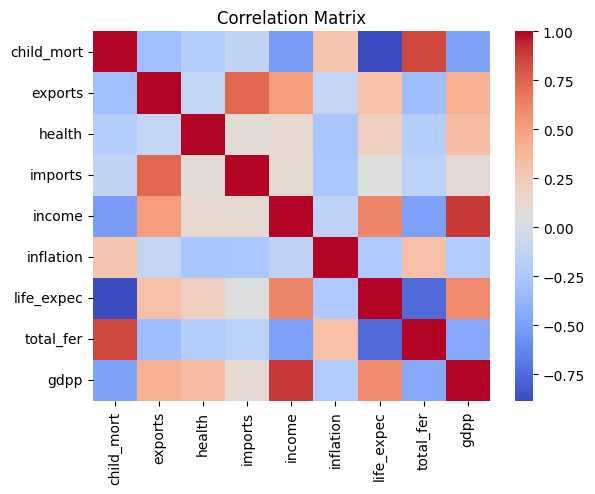

In [74]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
corr_matrix=country_df.corr()

# Plot the heatmap
plt.figure()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=False)
plt.title('Correlation Matrix')
plt.show()


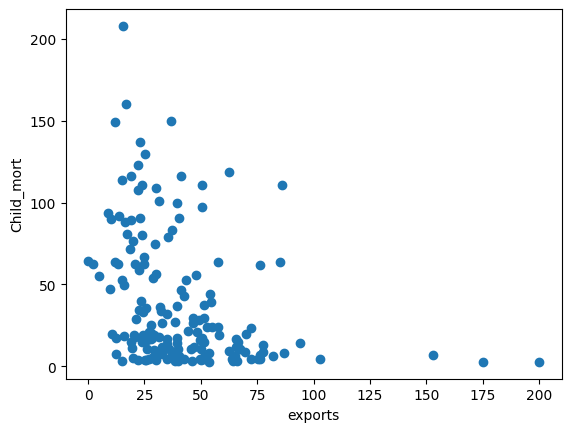

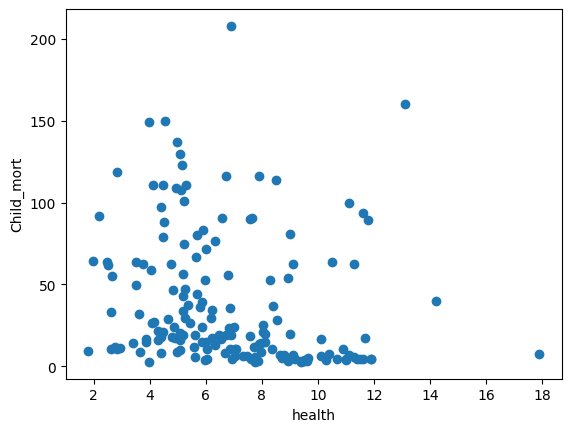

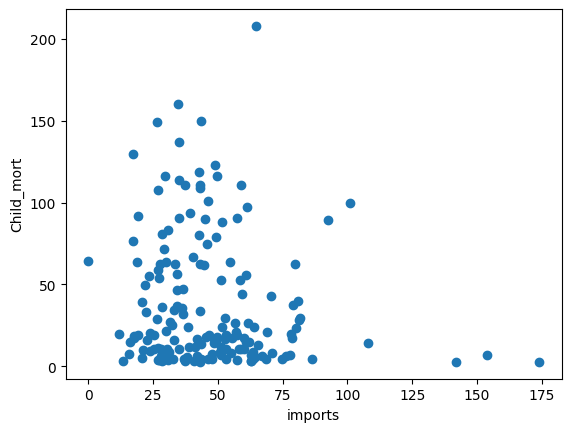

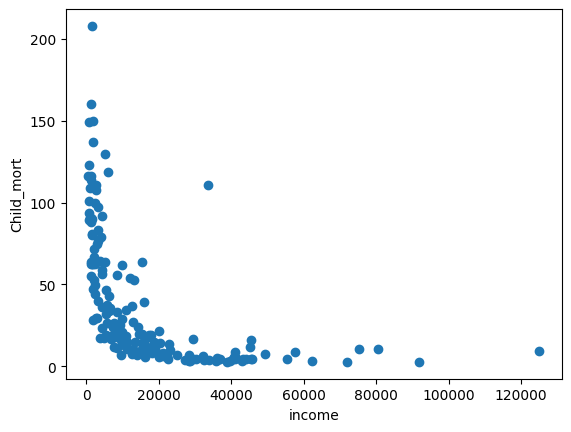

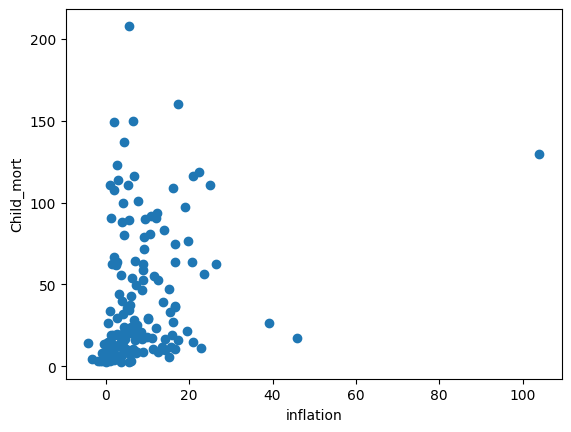

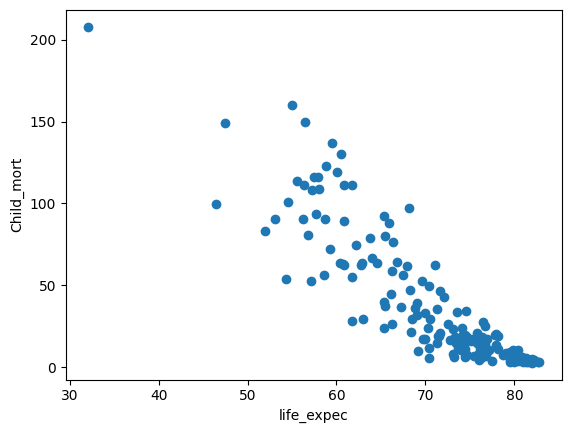

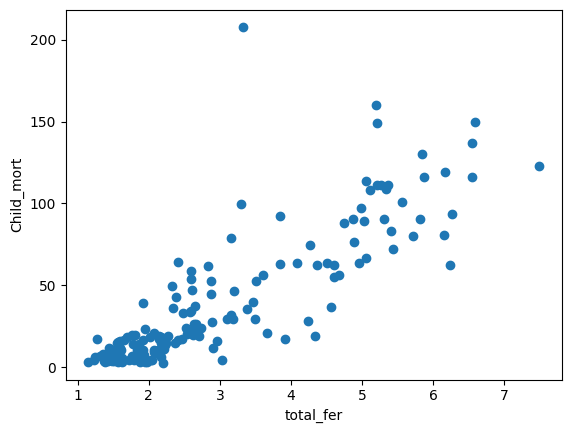

In [75]:
# Explore the continuous independent features against child_mort using scatter plots.
for f in country_df.columns[1:-1]:
  plt.scatter(country_df[f],country_df['child_mort'])
  plt.xlabel(f)
  plt.ylabel('Child_mort')
  plt.show()

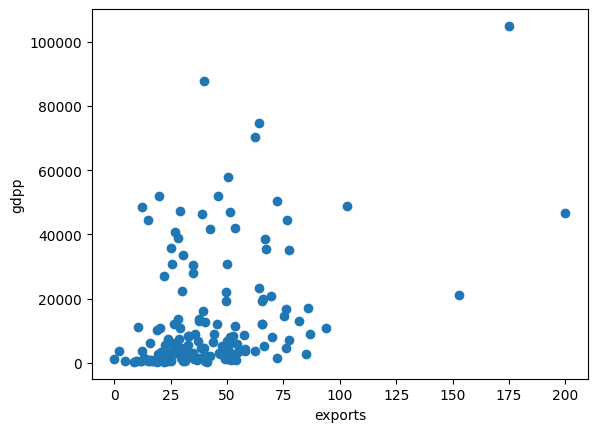

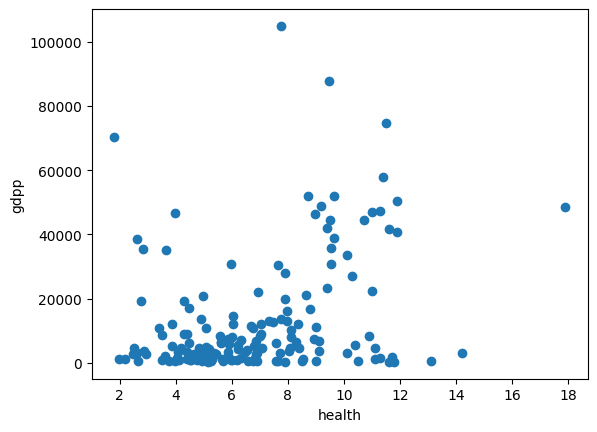

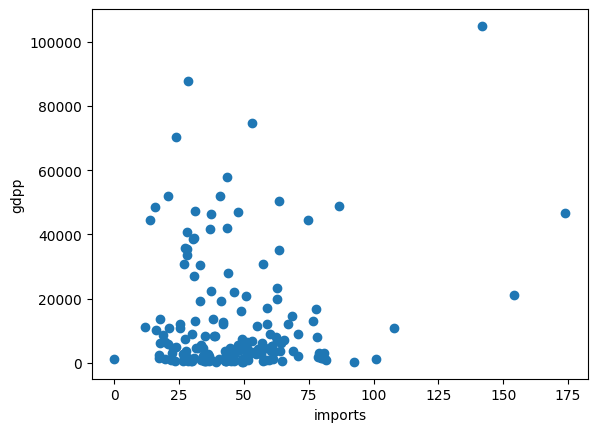

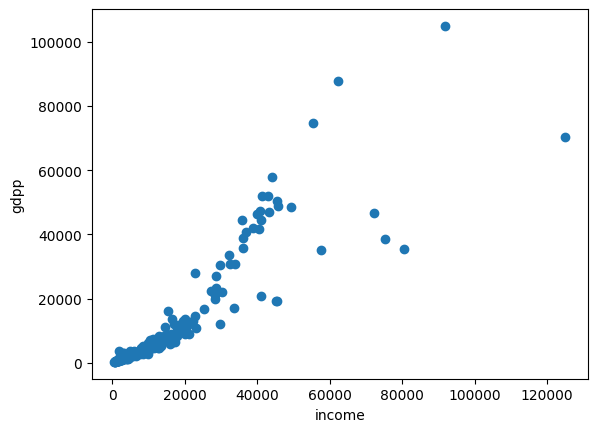

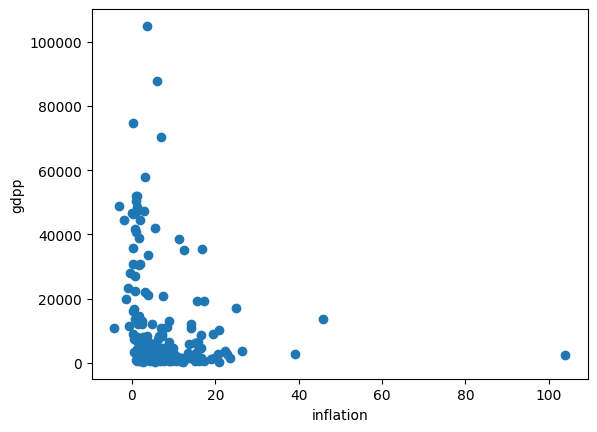

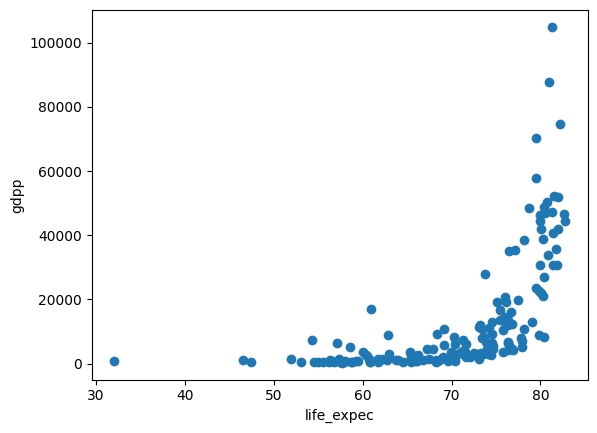

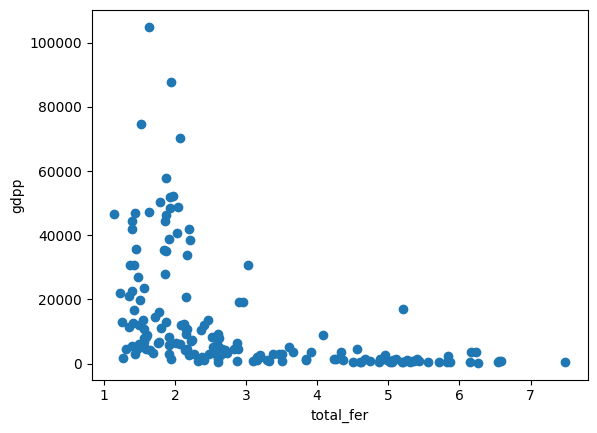

In [76]:
# Explore the continuous independent features against gdpp using scatter plots.
for f in country_df.columns[1:-1]:
  plt.scatter(country_df[f],country_df['gdpp'])
  plt.xlabel(f)
  plt.ylabel('gdpp')
  plt.show()

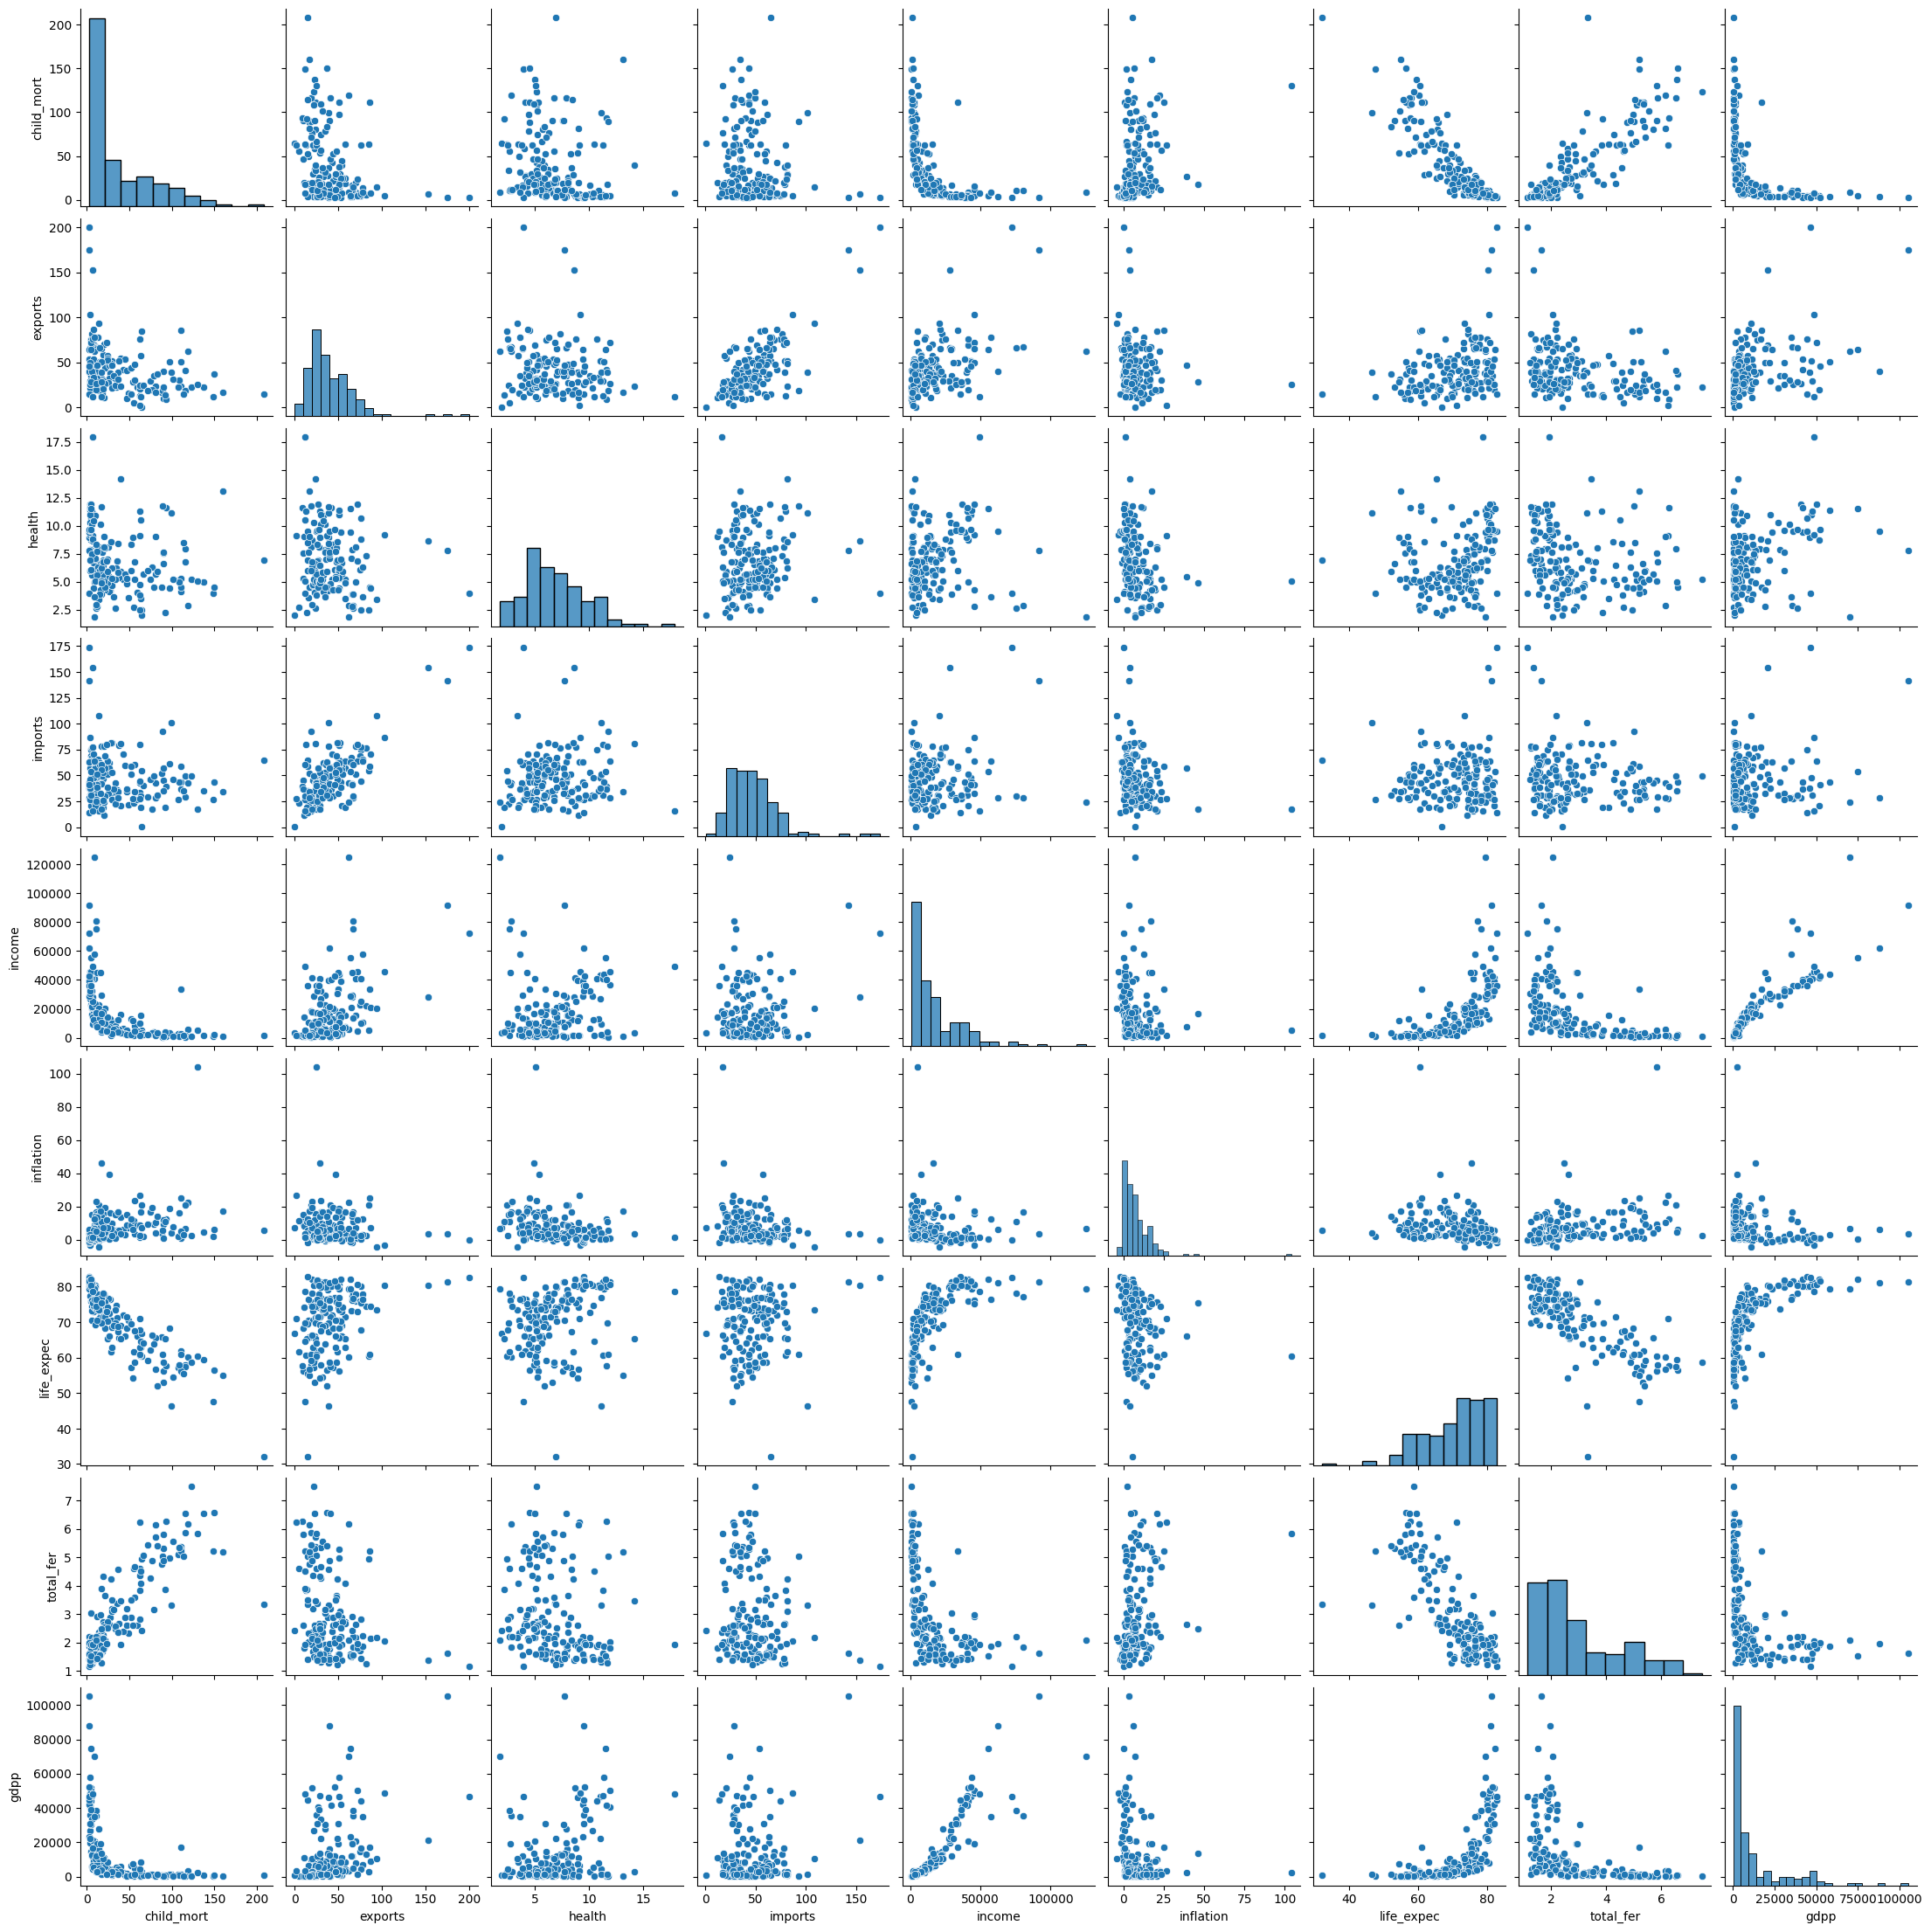

In [90]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(country_df)
plt.show()


### Scaling the Data

In [78]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(country_df)

df_scaled=pd.DataFrame(df_scaled, columns=country_df.columns)

# df_scaled.head()
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

In [79]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

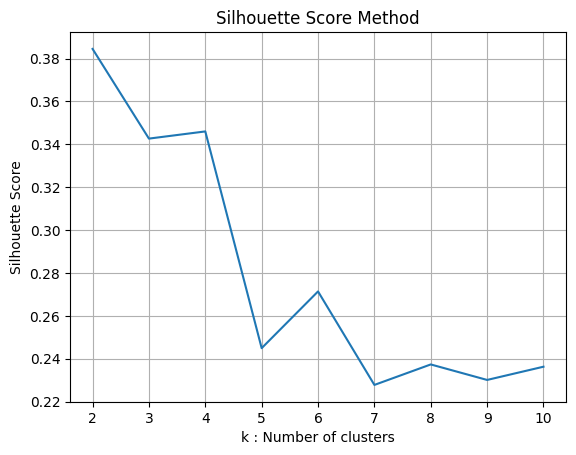

In [80]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

## Fitting a K-Means Model with the selected K value

In [84]:
# Remember to set the random_state to rseed
k=2
means=KMeans(n_clusters=k,random_state=rseed)
kmeans.fit(df_scaled)

KMeans(max_iter=500, n_clusters=10, random_state=42)

In [85]:
# Count the number of records in each cluster
df_scaled['Cluster'] = kmeans.labels_
cluster_counts= df_scaled['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    47
6    38
4    23
3    17
8    17
7     9
2     7
0     5
5     3
9     1
Name: count, dtype: int64


In [86]:
# Check model performance with the silhouette coefficient
labels=kmeans.labels_

silhouette_avg=silhouette_score(df_scaled,labels)

print('Silhouette Average:',silhouette_avg)

Silhouette Average: 0.7323031043383877


## Predictions

In [87]:
# Add the predicted cluster label column to the original dataframe
df_scaled['Cluster'] = kmeans.labels_

## Visualisation of clusters

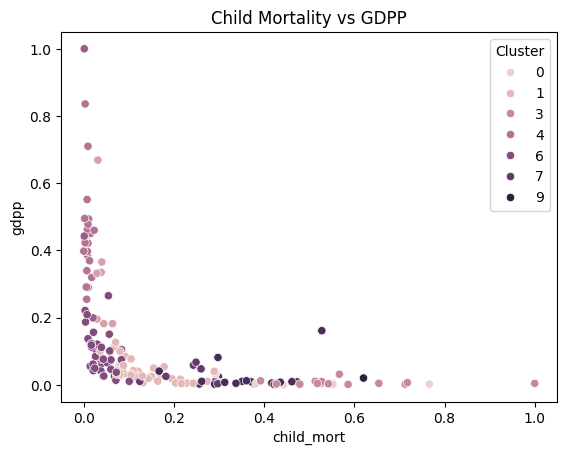

In [88]:
# Visualisation of clusters: child mortality vs gdpp

plt.figure()
sns.scatterplot(x='child_mort',y='gdpp',hue='Cluster',data=df_scaled)
plt.title('Child Mortality vs GDPP')
plt.show()

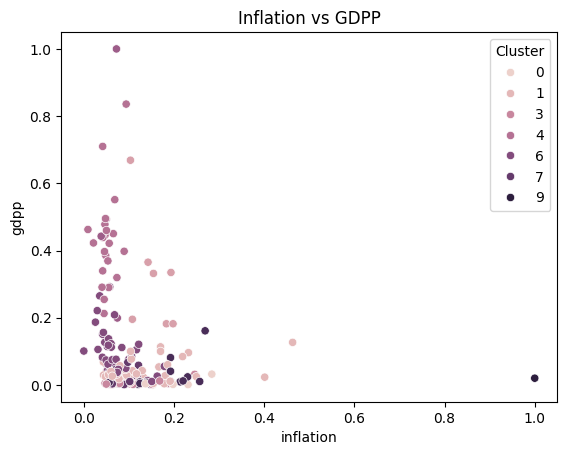

In [61]:
# Visualisation of clusters: inflation vs gdpp
plt.figure()
sns.scatterplot(x='inflation',y='gdpp', hue='Cluster',data=df_scaled)
plt.title('Inflation vs GDPP')
plt.show()



## Conclusions

As GDPP is an indicative of how wealthy or stable the economy of a country is, the higher the better. Countries with higher GDPP are considered to be developed, as it has a correlation to low child mortality, low inflation rates, high education and more positive statistics. High-income or developed countries have low inflation and child mortality rates and high GDPP, which coincides with clusters 3 and 4. Middle-Income developing countries have an average child mortality and inflation rates and moderate GDPP, represented by clusters 6,0 and 1. Lastly, Low income or least developed countries, tend to have a high child mortality and inflation rates as well as low GDPP, which clusters 7 and 9 portray.